# Setup

In [2]:
base_path_kry = '/home/mmandelbrod/repositories/'
base_path_mac = '/Users/mmaandelbrod/workspace/'
import sys
import os

tmp = !hostname
if tmp[0].startswith('krylov'):
    on_kry = True
else: 
    on_kry = False
    
base_path = base_path_kry if on_kry else base_path_mac

print(base_path)

sys.path.append(os.path.join(base_path, 'signals/'))
# sys.path.append(os.path.join(base_path, 'signals/src'))
sys.path.append(os.path.join(base_path, 'generative-signals/'))
sys.path.append(os.path.join(base_path, 'generative-signals/src'))
sys.path.append(os.path.join(base_path, 'signals/workflows/pipelines/'))
sys.path.append(os.path.join(base_path, 'signals/workflows/global_utils/'))
sys.path.append(os.path.join(base_path, 'signals/workflows'))
sys.path.append(os.path.join(base_path, 'matans_sandbox/utils'))

os.chdir(os.path.join(base_path,'generative-signals'))
print(f"curr dir: {os.getcwd()}")


/home/mmandelbrod/repositories/
curr dir: /home/mmandelbrod/repositories/generative-signals


In [3]:
import pyspark.sql.functions as F
import pandas as pd
import time

In [4]:
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import base64
from bs4 import BeautifulSoup
import re
from pyspark.sql.functions import broadcast


In [5]:
import data_extraction.extraction_funcs
from data_extraction.extraction_funcs import *


2024-08-23 15:02:25,442 INFO MainProcess darwin logger initialized
2024-08-23 15:02:26,795 DEBUG MainProcess matplotlib data path: /opt/conda/lib/python3.10/site-packages/matplotlib/mpl-data
2024-08-23 15:02:26,800 DEBUG MainProcess CONFIGDIR=/home/mmandelbrod/.config/matplotlib
2024-08-23 15:02:26,803 DEBUG MainProcess interactive is False
2024-08-23 15:02:26,803 DEBUG MainProcess platform is linux
2024-08-23 15:02:26,804 DEBUG MainProcess loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'posix', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib._abc', 'itertools', 'keyword', '_opera

bxkrylov - using spark config:  {
    "spark.driver.host": "10.207.20.58",
    "spark.rdd.compress": true,
    "spark.network.timeout": "600s",
    "spark.executor.heartbeatInterval": "300s",
    "spark.sql.broadcastTimeout": "12000s",
    "spark.yarn.queue": "hdlq-exprce-default",
    "spark.executor.extraJavaOptions": "-XX:MaxMetaspaceSize=512m -XX:ParallelGCThreads=3",
    "spark.driver.extraJavaOptions": "-XX:MaxMetaspaceSize=512m -XX:ParallelGCThreads=3",
    "spark.speculation": true,
    "spark.executor.cores": "5",
    "spark.driver.memory": "80g",
    "spark.executor.memory": "10g",
    "spark.driver.maxResultSize": "26g",
    "spark.dynamicAllocation.maxExecutors": 1000,
    "spark.dynamicAllocation.minExecutors": 400,
    "spark.executor.instances": 400,
    "spark.dynamicAllocation.initialExecutors": 400,
    "spark.executor.memoryOverhead": "26g",
    "spark.kryoserializer.buffer.max": "1500m",
    "spark.jars": "/home/mmandelbrod/.local/lib/python3.10/site-packages/bxkryl

SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/apache/releases/spark-3.1.1.1.0.0-bin-ebay/jars/parquet-kms-client-0.2.1.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/apache/releases/spark-3.1.1.1.0.0-bin-ebay/jars/slf4j-log4j12-1.7.30.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.slf4j.impl.Log4jLoggerFactory]
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/23 15:02:31 WARN Utils: Service 'sparkDriver' could not bind on port 30201. Attempting port 30202.
24/08/23 15:02:31 WARN Utils: Service 'SparkUI' could not bind on port 30401. Attempting port 30402.
24/08/23 15:02:34 WARN HiveConf: DEPRECATED: hive.metastore.ds.retry.* no longer has any effect.  Use hive.hmshandler.retry.* instead
24/08/23 15:02:34 WARN H

Java UDFs registered by Buyer experience HomePageFactsUDFs
Java UDFs registered by Buyer experience TextSim
Java UDFs registered by Buyer experience MADCDL



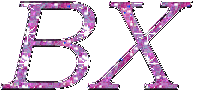

Python 3.10.12


In [6]:
import json
import os
from datetime import datetime
from functools import reduce
from typing import List

import bxkrylov
import bx_signals.etl.signals_fetcher as fetcher
from pyspark.sql.functions import array, col, expr, lower, when, row_number, lit, first, get_json_object, from_json, explode, split, count, collect_list, concat_ws, array_distinct, map_values, aggregate, size, regexp_replace, isnull, filter
from pyspark.sql.types import StructType, StructField, StringType, ArrayType, MapType, IntegerType, LongType
from pyspark.sql.functions import array_intersect, array_contains, array_except, coalesce, map_keys
from pyspark.sql import DataFrame

directory = "./signals_sanity_reports"
if not os.path.exists(directory):
    os.makedirs(directory)
    
min_execs = 400
max_execs = 1000

bxkrylov.spark_notebook(globals(),
                        spark_dynamicAllocation_minExecutors=min_execs,
                        spark_executor_instances=min_execs,
                        spark_dynamicAllocation_initialExecutors=min_execs,
                        spark_dynamicAllocation_maxExecutors=max_execs,
                        spark_executor_memory="10g",
                        spark_driver_maxResultSize="26g",
                        spark_executor_memoryOverhead="26g",
                        spark_driver_memory="80g",
                        spark_kryoserializer_buffer_max="1500m",
                        spark_executor_cores="5"                        
                        )

directory = "./signals_sanity_reports"
if not os.path.exists(directory):
    os.makedirs(directory)
    
!python3 -V
spark.sparkContext.setLogLevel("OFF")
spark


In [6]:
sys.path

['/home/mmandelbrod/repositories/generative-signals/notebooks/data_extraction',
 '/tmp/spark-d13eaf2e-9af2-4893-9f0f-6215e24563b1/userFiles-1f64a96a-85f9-4cb4-b40d-6e5a3a139007',
 '/opt/clients/pykrylov/3.10/latest/install',
 '/home/mmandelbrod/repositories/generative-signals/notebooks/data_extraction',
 '/opt/conda/lib/python310.zip',
 '/opt/conda/lib/python3.10',
 '/opt/conda/lib/python3.10/lib-dynload',
 '',
 '/home/mmandelbrod/.local/lib/python3.10/site-packages',
 '/opt/conda/lib/python3.10/site-packages',
 '/opt/clients/propeller/3.10/latest/install',
 '/home/mmandelbrod/repositories/signals/',
 '/home/mmandelbrod/repositories/generative-signals/',
 '/home/mmandelbrod/repositories/generative-signals/src',
 '/home/mmandelbrod/repositories/signals/workflows/pipelines/',
 '/home/mmandelbrod/repositories/signals/workflows/global_utils/',
 '/home/mmandelbrod/repositories/signals/workflows',
 '/home/mmandelbrod/repositories/matans_sandbox/utils',
 '/opt/conda/lib/python3.10/site-packag

## importlib

In [19]:
import importlib

import data_extraction.extraction_funcs
importlib.reload(data_extraction.extraction_funcs)
import data_extraction.extraction_funcs
from data_extraction.extraction_funcs import *

# import dataset_utils
# importlib.reload(dataset_utils)
# import dataset_utils
# from dataset_utils import *

# # import xgb_ranker_classifier_pipeline
# # importlib.reload(xgb_ranker_classifier_pipeline)
# # from xgb_ranker_classifier_pipeline import *

# import src.metrics.auuc_funcs
# importlib.reload(src.metrics.auuc_funcs)
# import src.metrics.auuc_funcs
# from src.metrics.auuc_funcs import *

# import pipelines.xgb_predict_signal_pipeline
# importlib.reload(pipelines.xgb_predict_signal_pipeline)
# import pipelines.xgb_predict_signal_pipeline
# from pipelines.xgb_predict_signal_pipeline import *



# import src.metrics.xgb_metrics_funcs
# importlib.reload(src.metrics.xgb_metrics_funcs)
# import src.metrics.xgb_metrics_funcs
# from src.metrics.auuc_funcs import *


# # import signals_pipeline_base
# # importlib.reload(signals_pipeline_base)
# #
# import pipelines.causalml_decision_tree_pipeline
# importlib.reload(pipelines.causalml_decision_tree_pipeline)
# import pipelines.causalml_decision_tree_pipeline
# from pipelines.causalml_decision_tree_pipeline import *

# # import config
# # importlib.reload(config)
# # from config import *

# import causal.causalml_funcs
# importlib.reload(causal.causalml_funcs)
# import causal.causalml_funcs
# from causal.causalml_funcs import *

# import pipeline_objects
# importlib.reload(pipeline_objects)
# from pipeline_objects import *
# #%%


In [7]:
from  data_extraction.extraction_funcs import extract_item_data

In [40]:
extract_item_data??

Signature:
extract_item_data(
    spark,
    start_date,
    end_date,
    metacats=None,
    leafcats=None,
)
Docstring: <no docstring>
Source:   
def extract_item_data(spark, start_date, end_date, metacats=None, leafcats=None):
    items_df = spark.table("ACCESS_VIEWS.DW_LSTG_ITEM").filter((F.col('auct_end_dt') >= start_date) &\
                                                               (F.col('auct_end_dt') <= end_date))
    #TODO: there's no meta_categ_id in the table. Fix this
    # if metacats is not None:
    #     items_df = items_df.filter(F.col('meta_categ_id').isin(metacats))
    if leafcats is not None:
        items_df = items_df.filter(F.col('leaf_categ_id').isin(leafcats))

    items_df = items_df.select('ITEM_ID', 'AUCT_START_DT', 'AUCT_END_DT',  'leaf_categ_id' )#.cache()

    description_df = spark.table("ACCESS_VIEWS.LSTG_ITEM_DESC_DIM").filter((F.col('auct_end_dt') >= start_date) &\
                                                                (F.col('auct_end

# Functions Definitions

In [16]:

valid_types = ['df']
invalid_aspect_names = ['mergednamespacenames', 'maturityscore',
                        'isprplinkenabled', 'lhexposetotse', 'seller-selected-epid',
                        'non-domestic product', 'modified item', 'upc',
                        'producttitle', 'ean', 'savedautotagprodrefid', 'ebay product id (epid)',
                        'gtin', 'california prop 65 warning', 'catrecoscore_1',
                        'catrecoscore_2', 'catrecoscore_3', 'catrecoid_1', 'catrecoid_2',
                        'catrecoid_3', 'miscatscore', 'p2sprobability', 'miscatscore_v1',
                        'uom1', 'miscatscore_v1', 'uom2', 'mpn', 'uom3', 'productimagezoomguid',
                        'manufacturer part number', 'isbn-13', 'isbn-10', 'other part number',
                        'miscatscore_cf_v1', 'isclplinkenabled', 'oe/oem part number',
                        'features', 'model', 'ks', 'number in pack',
                        'item height', 'item length', 'item width', 'item weight',
                        'number of items in set', 'food aisle', 'width', 'length', 'items included',
                        'custom bundle', 'volume', 'period after opening (pao)', 'featured refinements',
                        'set includes',
                        ]

def extract_item_data(spark, start_date, end_date, metacats=None, leafcats=None):
    items_df = spark.table("ACCESS_VIEWS.DW_LSTG_ITEM").filter((F.col('auct_end_dt') >= start_date) &\
                                                               (F.col('auct_end_dt') <= end_date))
    #TODO: there's no meta_categ_id in the table. Fix this
    # if metacats is not None:
    #     items_df = items_df.filter(F.col('meta_categ_id').isin(metacats))
    if leafcats is not None:
        items_df = items_df.filter(F.col('leaf_categ_id').isin(leafcats))

    items_df = items_df.select('ITEM_ID', 'AUCT_START_DT', 'AUCT_END_DT',  'leaf_categ_id' )#.cache()
    
    aspects_df = spark.table("ACCESS_VIEWS.ITEM_ASPCT_CLSSFCTN_SAP").filter((F.col('auct_end_dt') >= start_date)&\
                                                                (F.col('auct_end_dt') <= end_date)&\
                                                                (F.col("NS_TYPE_CD").isin(valid_types))&\
                                                                 (~F.col("PRDCT_ASPCT_NM").isin(invalid_aspect_names))
                                                                )
    aspects_items_df = aspects_df.join(broadcast(items_df), on=['ITEM_ID', "AUCT_END_DT"])
    return aspects_items_df
    



# Improving runtime 

In [21]:
start_date = '2024-08-20'
end_date = '2024-08-20'
# leafcats=[165193, 165194]
leafcats=[165193]

In [22]:
aspects_items_df = extract_item_data(spark, start_date, end_date, metacats=None, leafcats=leafcats)

In [23]:
start = time.time()
aspects_items_pdf = aspects_items_df.toPandas()
end = time.time()
print(f"elapsed time (min): {(end - start)//60}")
aspects_pdf

IOPub message rate exceeded.==>                            (4252 + 300) / 10000]
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

24/08/21 15:22:20 ERROR YarnScheduler: Lost executor 207 on hdc42-mcc10-01-0510-3702-033-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/21 15:22:41 ERROR YarnScheduler: Lost executor 175 on hdc42-mcc10-01-0210-6002-015-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/21 15:23:11 ERROR YarnScheduler: Lost executor 122 on hdc42-mcc10-01-0910-1909-036-tess0028.stratus.rno.ebay.com: Executor decommission.
24/08/21 15:23:15 ERROR YarnScheduler: Lost executor 160 on hdc42-mcc10-01-0210-7102-019-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/21 15:23:17 ERROR YarnScheduler: Lost executor 211 o

elapsed time (min): 170.0


NameError: name 'aspects_pdf' is not defined

In [18]:
aspects_items_df

NameError: name 'aspects_items_df' is not defined

# Full dataset generation

In [20]:
# extract_item_data??

In [12]:
start_date = '2024-08-28'
end_date = '2024-08-28'
leafcats = [261328] 
n_items = 1000
take_shortest_dup_value = False

In [ ]:
start = time.time()
items_aspects_df_261328 = extract_item_data(spark, start_date, end_date, leafcats=leafcats, n_items = n_items, take_shortest_dup_value=take_shortest_dup_value )
items_aspects_pdf_261328 = items_aspects_df_261328.toPandas()
items_aspects_pdf_261328.to_parquet('data/items_aspects_pdf_261328.parquet')
end = time.time()
print(f"elapsed time (min): {(end - start)//60}")


Adding aspects
Adding descriptions


24/08/23 16:48:43 ERROR YarnScheduler: Lost executor 1288 on hdc42-mcc10-01-1110-3602-009-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/23 16:48:44 ERROR YarnScheduler: Lost executor 2018 on hdc42-mcc10-01-0210-7509-005-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/23 16:48:45 ERROR YarnScheduler: Lost executor 1092 on hdc42-mcc10-01-0510-3502-013-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/23 16:48:46 ERROR YarnScheduler: Lost executor 1986 on hdc42-mcc10-01-1110-3406-007-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/23 16:48:50 ERROR YarnScheduler: Lost executor 1236 on hdc42-mcc10-01-0210-5901-019-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/23 16:48:54 ERROR YarnScheduler: Lost executor 1477 on hdc42-mcc10-01-1110-2504-005-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/23 16:48:54 ERROR YarnScheduler: Lost executor 1118 on hdc42-mcc10-01-0110-7501-001-tess0173.stratus.rno.ebay.com: Executor decomm

In [21]:
items_aspects_pdf_261328

NameError: name 'items_aspects_pdf_261328' is not defined

### Execution times tests 

In [16]:
start = time.time()
items_df.count()
end = time.time()
print(f"elapsed time (min): {(end - start)//60}")

elapsed time (min): 4.0


In [ ]:
start = time.time()
aspects_df_count = aspects_df.count()
end = time.time()
print(f"elapsed time (min): {(end - start)//60}")

In [17]:
aspects_df_count

NameError: name 'aspects_df_count' is not defined

In [15]:
print(f"elapsed time (min): {(end - start)//60}")

NameError: name 'end' is not defined

In [12]:
aspects_df_count

NameError: name 'aspects_df_count' is not defined

## Part 2 - breakdwon of collect_item_aspects

In [ ]:
start = time.time()
df_items = items_df
df_aspects = aspects_df
df_item_aspects = df_aspects.join(df_items, on=['ITEM_ID', 'AUCT_END_DT'])
df_item_aspects.write.parquet('hdfs://apollo-rno/user/b_perso/mmandelbrod/df_item_aspects_from_krylov.parquet')
# print(df_item_aspects.count())
end = time.time()
print(f"elapsed time (min): {(end - start)//60}")

In [22]:
df_item_aspects

DataFrame[item_id: decimal(18,0), auct_end_dt: date, prdct_aspct_nm: string, aspct_vlu_nm: string, ns_type_cd: string, aspct_src: int, load_ts: string, key_type: tinyint, AUCT_START_DT: date, leaf_categ_id: decimal(9,0)]

In [24]:
df_item_aspects_pdf = pd.read_parquet('data/df_item_aspects_from_krylov.parquet/')
df_item_aspects_pdf

,item_id,auct_end_dt,prdct_aspct_nm,aspct_vlu_nm,ns_type_cd,aspct_src,load_ts,key_type,AUCT_START_DT,leaf_categ_id
0,334673485722,2024-08-20,Original/Reproduction,Original,umns,101,2024-07-20 20:02:45,1,2022-12-20,165194
1,334673485722,2024-08-20,type,Gas Pump,sdner,160,2024-07-20 20:02:45,1,2022-12-20,165194
2,334673485722,2024-08-20,core_product_type_v3,Collectibles,preco,228,2024-07-20 20:02:45,1,2022-12-20,165194
3,334673485722,2024-08-20,Brand,John Deere,aenv,3,2024-07-20 20:02:45,1,2022-12-20,165194
4,334673485722,2024-08-20,material,Metal Tin,dft7,197,2024-07-20 20:02:45,1,2022-12-20,165194
...,...,...,...,...,...,...,...,...,...,...
4265,266914324092,2024-08-20,coreOntologyVisited,1723686740749,sd,193,2024-08-14 18:50:14,1,2024-07-20,165194
4266,266914324092,2024-08-20,status,TRAFFIC_FILTERED_OUT,sd,268,2024-08-14 18:50:14,1,2024-07-20,165194
4267,266914324092,2024-08-20,categoryId,165194,sdner,160,2024-08-14 18:50:14,1,2024-07-20,165194
4268,266914324092,2024-08-20,productTypeModelAnnotatorVisited,1723686740311,sd,228,2024-08-14 18:50:14,1,2024-07-20,165194


### Examine specific listing (285868885432)

In [26]:
df_item_aspects_pdf['item_id'].value_counts()

item_id
364431820792    408
156130055263    395
364852534006    171
334567323247    170
276474900499    165
305363174949    161
305150783870    154
276474911494    151
387020042694    149
405173910460    147
285868885432    147
235018424150    147
334673485722    146
266914319338    146
145902363635    146
305727308320    145
266948032540    143
266914324092    142
403422040982    139
264248084497    138
114077191682    136
335450451587    136
145950472855    130
126623884354    128
226011945904    120
166834125389    110
Name: count, dtype: int64

In [28]:
df_285868885432 = df_item_aspects_pdf[df_item_aspects_pdf['item_id'] == 285868885432]
df_285868885432[['prdct_aspct_nm', 'aspct_vlu_nm']]

,prdct_aspct_nm,aspct_vlu_nm
3270,Original/Reproduction,Original
3271,productTypeAttributesVisited,1723657608427
3272,CatLogPriceSD,0.7095790387600255
3273,Original/Reproduction,Original
3274,Brand,John Deere
...,...,...
3412,DescSummary,stamps : all stamps are mint never hinged.
3413,QryItemSimEmbA,jTEOquYmn7H/Ky6wL6+YrT8x9ij/r1curDAwMPQdeyY4sa...
3414,DescSummary,the 1981 john deere employees credit union ban...
3415,ItemSimEmbA,H60JLJQx4jDrK6Cu7a+uMq8tnChGLEwphrJpG7qmoyAYsQ...


In [29]:
df_285868885432['prdct_aspct_nm'].value_counts()

prdct_aspct_nm
DescSummary              15
Brand                    11
Theme                     9
Original/Reproduction     7
skip                      6
                         ..
CatLogPriceMean           1
rlogId                    1
status                    1
descHash                  1
MarketPriceConfidence     1
Name: count, Length: 97, dtype: int64

In [30]:
[len(a) for a in df_285868885432['aspct_vlu_nm']]

[8,
 13,
 18,
 8,
 10,
 8,
 78,
 8,
 7,
 11,
 13,
 10,
 13,
 11,
 17,
 20,
 10,
 7,
 6,
 256,
 13,
 11,
 4,
 10,
 13,
 10,
 10,
 19,
 4,
 13,
 8,
 13,
 7,
 10,
 18,
 13,
 12,
 11,
 12,
 11,
 18,
 1,
 19,
 29,
 13,
 32,
 20,
 72,
 18,
 22,
 2,
 7,
 18,
 19,
 19,
 4,
 8,
 4,
 41,
 29,
 10,
 7,
 10,
 4,
 22,
 18,
 11,
 13,
 7,
 29,
 18,
 10,
 24,
 10,
 7,
 18,
 2,
 77,
 6,
 1,
 4,
 88,
 256,
 4,
 3,
 4,
 34,
 256,
 34,
 34,
 13,
 18,
 23,
 6,
 37,
 10,
 256,
 9,
 83,
 78,
 24,
 2,
 32,
 344,
 3,
 101,
 50,
 62,
 13,
 3,
 8,
 60,
 1,
 10,
 18,
 256,
 81,
 2,
 34,
 0,
 112,
 34,
 32,
 3,
 8,
 11,
 78,
 256,
 6,
 1,
 18,
 4,
 2,
 6,
 4,
 4,
 34,
 18,
 19,
 34,
 34,
 31,
 42,
 256,
 147,
 256,
 5]

In [31]:
df_285868885432[df_285868885432['prdct_aspct_nm'] == 'DescSummary']

,item_id,auct_end_dt,prdct_aspct_nm,aspct_vlu_nm,ns_type_cd,aspct_src,load_ts,key_type,AUCT_START_DT,leaf_categ_id
3347,285868885432,2024-08-20,DescSummary,the bank was created in 1981 and is a true rep...,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3351,285868885432,2024-08-20,DescSummary,the best way to assess condition is either pro...,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3362,285868885432,2024-08-20,DescSummary,all stamps are genuine.,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3364,285868885432,2024-08-20,DescSummary,coins : coins are graded differently.,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3368,285868885432,2024-08-20,DescSummary,this is a rare and unique collectible for any ...,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3370,285868885432,2024-08-20,DescSummary,comes with original box.,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3375,285868885432,2024-08-20,DescSummary,"challenge coins : are all metal, beautifully h...",cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3376,285868885432,2024-08-20,DescSummary,i price in accordance with the chip rack crite...,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3377,285868885432,2024-08-20,DescSummary,the model d was the first tractor to bear the ...,cu,163,2024-08-16 07:57:15,2,2024-05-20,165194
3381,285868885432,2024-08-20,DescSummary,"the bank measures 4 1/2"" wide x 4 1/2"" tall an...",cu,163,2024-08-16 07:57:15,2,2024-05-20,165194


In [32]:
df_285868885432[df_285868885432['prdct_aspct_nm'] == 'Brand']

,item_id,auct_end_dt,prdct_aspct_nm,aspct_vlu_nm,ns_type_cd,aspct_src,load_ts,key_type,AUCT_START_DT,leaf_categ_id
3274,285868885432,2024-08-20,Brand,John Deere,sdattr,102,2024-08-14 10:32:18,1,2024-05-20,165194
3281,285868885432,2024-08-20,Brand,John Deere,df,3,2024-08-14 10:32:18,1,2024-05-20,165194
3286,285868885432,2024-08-20,Brand,John Deere,df,30,2024-08-14 10:32:18,1,2024-05-20,165194
3293,285868885432,2024-08-20,Brand,John Deere,vdf,156,2024-08-14 10:32:18,1,2024-05-20,165194
3296,285868885432,2024-08-20,Brand,John Deere,ae,3,2024-08-14 10:32:18,1,2024-05-20,165194
3330,285868885432,2024-08-20,Brand,John Deere,umns,101,2024-08-14 10:32:18,1,2024-05-20,165194
3332,285868885432,2024-08-20,Brand,john deere,da,267,2024-08-14 10:32:18,1,2024-05-20,165194
3341,285868885432,2024-08-20,Brand,John Deere,aenv,3,2024-08-14 10:32:18,1,2024-05-20,165194
3343,285868885432,2024-08-20,Brand,John Deere,df,101,2024-08-14 10:32:18,1,2024-05-20,165194
3346,285868885432,2024-08-20,Brand,jd,da,240,2024-08-14 10:32:18,1,2024-05-20,165194


In [33]:
df_285868885432[df_285868885432['prdct_aspct_nm'] == 'Theme']

,item_id,auct_end_dt,prdct_aspct_nm,aspct_vlu_nm,ns_type_cd,aspct_src,load_ts,key_type,AUCT_START_DT,leaf_categ_id
3278,285868885432,2024-08-20,Theme,farming,da,240,2024-08-14 10:32:18,1,2024-05-20,165194
3279,285868885432,2024-08-20,Theme,Agriculture,umns,101,2024-08-14 10:32:18,1,2024-05-20,165194
3283,285868885432,2024-08-20,Theme,Agriculture,df,101,2024-08-14 10:32:18,1,2024-05-20,165194
3291,285868885432,2024-08-20,Theme,Agriculture,sdattr,102,2024-08-14 10:32:18,1,2024-05-20,165194
3306,285868885432,2024-08-20,Theme,agricultural,da,240,2024-08-14 10:32:18,1,2024-05-20,165194
3307,285868885432,2024-08-20,Theme,Agriculture,aenv,3,2024-08-14 10:32:18,1,2024-05-20,165194
3309,285868885432,2024-08-20,Theme,Agriculture,df,3,2024-08-14 10:32:18,1,2024-05-20,165194
3336,285868885432,2024-08-20,Theme,Agriculture,vdf,156,2024-08-14 10:32:18,1,2024-05-20,165194
3395,285868885432,2024-08-20,Theme,Agriculture,vdf,185,2024-08-16 07:57:15,2,2024-05-20,165194


In [34]:
valid_df = df_285868885432[df_285868885432['ns_type_cd'] == 'df']
len(valid_df)

16

In [36]:
valid_df['prdct_aspct_nm'].value_counts()

prdct_aspct_nm
Brand                    3
Original/Reproduction    2
Theme                    2
core_product_type_v2     2
CatRecoID_1              1
CatRecoScore_1           1
MiscatScore              1
CatRecoID_2              1
CatRecoScore_3           1
CatRecoID_3              1
CatRecoScore_2           1
Name: count, dtype: int64

In [37]:
valid_df[valid_df['prdct_aspct_nm'] == 'core_product_type_v2']

,item_id,auct_end_dt,prdct_aspct_nm,aspct_vlu_nm,ns_type_cd,aspct_src,load_ts,key_type,AUCT_START_DT,leaf_categ_id
3328,285868885432,2024-08-20,core_product_type_v2,Piggy Banks & Money Jars: primary product,df,228,2024-08-14 10:32:18,1,2024-05-20,165194
3339,285868885432,2024-08-20,core_product_type_v2,Collectibles: primary product,df,228,2024-08-14 10:32:18,1,2024-05-20,165194


In [45]:
items_df = spark.table("ACCESS_VIEWS.DW_LSTG_ITEM")
items_df.columns
df_items = df_items.select('ITEM_ID', "AUCT_END_DT").dropDuplicates()
df_items = df_items.select('ITEM_ID', "AUCT_END_DT").dropDuplicates()
df_items.count()

24/08/17 15:18:28 ERROR TaskSetManager: Task 3 in stage 17.0 failed 4 times; aborting job


Py4JJavaError: An error occurred while calling o879.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 3 in stage 17.0 failed 4 times, most recent failure: Lost task 3.3 in stage 17.0 (TID 102010) (hdc42-mcc10-01-1110-3305-034-tess0029.stratus.rno.ebay.com executor 764): java.io.FileNotFoundException: File does not exist: /sys/edw/gdw_tables/lstg/dw_lstg_item/snapshot/dt=20240814/part-00003-e4ebfdf4-8f65-48b4-b7e0-63c54849bd24_00003.c000.snappy.parquet
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:132)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:177)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:101)
	at org.apache.spark.sql.execution.FileSourceScanExec$$anon$1.hasNext(DataSourceScanExec.scala:500)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.columnartorow_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_1$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:756)
	at org.apache.spark.sql.execution.columnar.DefaultCachedBatchSerializer$$anon$1.hasNext(InMemoryRelation.scala:118)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:299)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1423)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1350)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1414)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1237)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:384)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:335)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:498)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1465)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:501)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2303)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2252)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2251)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2251)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1124)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1124)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1124)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2490)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2432)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2421)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
Caused by: java.io.FileNotFoundException: File does not exist: /sys/edw/gdw_tables/lstg/dw_lstg_item/snapshot/dt=20240814/part-00003-e4ebfdf4-8f65-48b4-b7e0-63c54849bd24_00003.c000.snappy.parquet
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:132)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:177)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:101)
	at org.apache.spark.sql.execution.FileSourceScanExec$$anon$1.hasNext(DataSourceScanExec.scala:500)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.columnartorow_nextBatch_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_1$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithKeys_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anon$1.hasNext(WholeStageCodegenExec.scala:756)
	at org.apache.spark.sql.execution.columnar.DefaultCachedBatchSerializer$$anon$1.hasNext(InMemoryRelation.scala:118)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at org.apache.spark.storage.memory.MemoryStore.putIterator(MemoryStore.scala:221)
	at org.apache.spark.storage.memory.MemoryStore.putIteratorAsValues(MemoryStore.scala:299)
	at org.apache.spark.storage.BlockManager.$anonfun$doPutIterator$1(BlockManager.scala:1423)
	at org.apache.spark.storage.BlockManager.org$apache$spark$storage$BlockManager$$doPut(BlockManager.scala:1350)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:1414)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:1237)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:384)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:335)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:52)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:498)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1465)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:501)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)


In [35]:
[f for f in items_df.columns if 'meta' in f]

[]

In [ ]:
.filter((F.col(filter_colname) >= start_date) &\
                                                               (F.col(filter_colname) <= end_date))

In [12]:
items_df.columns

['ITEM_ID', 'AUCT_START_DT', 'AUCT_END_DT']

In [16]:
items_df_cat.select('leaf_categ_id').dtypes

[('leaf_categ_id', 'decimal(9,0)')]

In [18]:
items_df_cat = items_df.filter((F.col(filter_colname) >= start_date) &\
                (F.col(filter_colname) <= end_date) &\
                (F.col('leaf_categ_id') == 165193)
               )
items_df_cat.count()




24/08/15 17:09:40 ERROR YarnScheduler: Lost executor 144 on hdc42-mcc10-01-1110-4205-037-tess0029.stratus.rno.ebay.com: Container from a bad node: container_e4084_1723088988367_616827_02_000047 on host: hdc42-mcc10-01-1110-4205-037-tess0029.stratus.rno.ebay.com. Exit status: 143. Diagnostics: [2024-08-15 10:09:38.251]Container killed on request. Exit code is 143
[2024-08-15 10:09:38.251]Container exited with a non-zero exit code 143. 
[2024-08-15 10:09:38.256]Killed by external signal
.
24/08/15 17:12:56 ERROR YarnScheduler: Lost executor 260 on hdc42-mcc10-01-1110-1902-033-tess0029.stratus.rno.ebay.com: Executor heartbeat timed out after 641648 ms


1

In [24]:
items_df_cat = items_df.filter((F.col(filter_colname) >= start_date) &\
                (F.col(filter_colname) <= end_date) &\
                (F.col('leaf_categ_id').isin([165193, 165194]))
               )
items_df_cat.count()


7

24/08/16 08:18:21 ERROR YarnScheduler: Lost executor 659 on hdc42-mcc10-01-1110-1808-013-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/16 08:18:22 ERROR YarnScheduler: Lost executor 686 on hdc42-mcc10-01-1110-2104-018-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/16 08:18:22 ERROR YarnScheduler: Lost executor 681 on hdc42-mcc10-01-0510-3708-034-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/16 08:18:22 ERROR YarnScheduler: Lost executor 732 on hdc42-mcc10-01-0110-7504-002-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/16 08:18:22 ERROR YarnScheduler: Lost executor 678 on hdc42-mcc10-01-0210-6002-027-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/16 08:18:23 ERROR YarnScheduler: Lost executor 712 on hdc42-mcc10-01-0510-1703-033-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/16 08:18:23 ERROR YarnScheduler: Lost executor 710 on hdc42-mcc10-01-0210-5405-021-tess0131.stratus.rno.ebay.com: Executor decommission.

In [22]:
items_df_cat_pdf = items_df_cat.select('ITEM_ID', 'AUCT_START_DT', 'AUCT_END_DT', 'leaf_categ_id' ).toPandas()
items_df_cat_pdf

,ITEM_ID,AUCT_START_DT,AUCT_END_DT,leaf_categ_id
0,116241526281,2024-07-05,2024-07-15,165193


In [23]:
items_df_cat_pdf

,ITEM_ID,AUCT_START_DT,AUCT_END_DT,leaf_categ_id
0,116241526281,2024-07-05,2024-07-15,165193


24/08/15 19:28:24 ERROR YarnScheduler: Lost executor 654 on hdc42-mcc10-01-1110-3404-028-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/15 19:28:26 ERROR YarnScheduler: Lost executor 611 on hdc42-mcc10-01-0110-7102-022-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/15 19:28:27 ERROR YarnScheduler: Lost executor 644 on hdc42-mcc10-01-0710-3607-010-tess0035.stratus.rno.ebay.com: Executor decommission.
24/08/15 19:28:27 ERROR YarnScheduler: Lost executor 591 on hdc42-mcc10-01-1110-1904-019-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/15 19:28:27 ERROR YarnScheduler: Lost executor 602 on hdc42-mcc10-01-0110-7704-030-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/15 19:28:28 ERROR YarnScheduler: Lost executor 615 on hdc42-mcc10-01-0210-7401-018-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/15 19:28:28 ERROR YarnScheduler: Lost executor 646 on hdc42-mcc10-01-1110-4104-025-tess0029.stratus.rno.ebay.com: Executor decommission.

In [10]:
# items_df.agg({"auct_start_dt": "max"}).collect()[0][0]
# items_df.select('auct_start_dt')

datetime.date(2024, 7, 15)

24/08/13 12:17:14 ERROR YarnScheduler: Lost executor 172 on hdc42-mcc10-01-0510-3807-018-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/13 12:17:14 ERROR YarnScheduler: Lost executor 105 on hdc42-mcc10-01-0210-7702-022-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/13 12:17:15 ERROR YarnScheduler: Lost executor 149 on hdc42-mcc10-01-0110-7305-014-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/13 12:17:15 ERROR YarnScheduler: Lost executor 94 on hdc42-mcc10-01-1110-3803-017-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/13 12:17:15 ERROR YarnScheduler: Lost executor 131 on hdc42-mcc10-01-1110-4206-034-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/13 12:17:16 ERROR YarnScheduler: Lost executor 148 on hdc42-mcc10-01-0710-4201-012-tess0035.stratus.rno.ebay.com: Executor decommission.
24/08/13 12:17:16 ERROR YarnScheduler: Lost executor 122 on hdc42-mcc10-01-0710-3606-017-tess0035.stratus.rno.ebay.com: Executor decommission.


In [ ]:
df_items_aspects = collect_item_aspects(spark, items_df, aspects_df)
pdf = df_items_aspects.limit(10).toPandas()
pdf

24/08/13 13:10:48 ERROR YarnScheduler: Lost executor 67 on hdc42-mcc10-01-0510-3902-028-tess0097.stratus.rno.ebay.com: Container container_e4084_1723088988367_504684_01_000121 on host: hdc42-mcc10-01-0510-3902-028-tess0097.stratus.rno.ebay.com was preempted.
24/08/13 13:10:48 ERROR YarnScheduler: Lost executor 58 on hdc42-mcc10-01-0510-1702-027-tess0097.stratus.rno.ebay.com: Container container_e4084_1723088988367_504684_01_000098 on host: hdc42-mcc10-01-0510-1702-027-tess0097.stratus.rno.ebay.com was preempted.
24/08/13 13:10:48 ERROR YarnScheduler: Lost executor 76 on hdc42-mcc10-01-1110-3701-006-tess0029.stratus.rno.ebay.com: Container container_e4084_1723088988367_504684_01_000130 on host: hdc42-mcc10-01-1110-3701-006-tess0029.stratus.rno.ebay.com was preempted.
24/08/13 13:10:48 ERROR YarnScheduler: Lost executor 71 on hdc42-mcc10-01-0510-1904-036-tess0097.stratus.rno.ebay.com: Container container_e4084_1723088988367_504684_01_000125 on host: hdc42-mcc10-01-0510-1904-036-tess0097.

In [15]:
pdf

NameError: name 'pdf' is not defined

In [17]:
items_df_small = items_df.limit(100)
items_df_small.show()

+------------+-------------+-----------+
|     ITEM_ID|AUCT_START_DT|AUCT_END_DT|
+------------+-------------+-----------+
|114171507568|   2020-04-04| 2024-07-15|
|264737223329|   2020-05-31| 2024-07-15|
|114253382847|   2020-06-08| 2024-07-15|
|265992204016|   2022-11-15| 2024-07-15|
|114556217875|   2020-12-03| 2024-07-15|
|266354362529|   2023-07-31| 2024-07-15|
|114939239865|   2021-08-16| 2024-07-15|
|266413441323|   2023-09-15| 2024-07-15|
|115282510241|   2022-03-06| 2024-07-15|
|266428280489|   2023-09-27| 2024-07-15|
|115286808023|   2022-03-09| 2024-07-15|
|266470702445|   2023-10-24| 2024-07-15|
|115316392788|   2022-03-28| 2024-07-15|
|266481299944|   2023-10-30| 2024-07-15|
|115350724452|   2022-04-19| 2024-07-15|
|266568565468|   2023-12-15| 2024-07-15|
|115370939363|   2022-05-04| 2024-07-15|
|266568566045|   2023-12-15| 2024-07-15|
|115434223495|   2022-06-20| 2024-07-15|
|266619729680|   2024-01-15| 2024-07-15|
+------------+-------------+-----------+
only showing top

24/08/14 10:14:56 ERROR YarnScheduler: Lost executor 354 on hdc42-mcc10-01-0110-7802-015-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/14 10:14:56 ERROR YarnScheduler: Lost executor 265 on hdc42-mcc10-01-0210-5302-040-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/14 10:14:56 ERROR YarnScheduler: Lost executor 330 on hdc42-mcc10-01-0510-1702-023-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/14 10:14:57 ERROR YarnScheduler: Lost executor 342 on hdc42-mcc10-01-1110-3908-040-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/14 10:14:57 ERROR YarnScheduler: Lost executor 306 on hdc42-mcc10-01-0210-7707-019-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/14 10:14:57 ERROR YarnScheduler: Lost executor 293 on hdc42-mcc10-01-0210-6002-002-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/14 10:14:57 ERROR YarnScheduler: Lost executor 334 on hdc42-mcc10-01-0510-3902-019-tess0097.stratus.rno.ebay.com: Executor decommission.

## Create a small dataset to verify the flow

# Listings Description

In [4]:
desc_table = spark.table('ACCESS_VIEWS.LSTG_ITEM_DESC_DIM')


In [5]:
desc_table.columns

['item_id',
 'site_id',
 'auct_end_date',
 'auct_end_dt',
 'auct_start_date',
 'auct_start_dt',
 'last_mdfd_date',
 'slr_id',
 'auct_type_cd',
 'item_desc_lgth_num',
 'item_desc']

In [6]:
df_desc = desc_table.limit(10)
df_desc.show()


+------------+-------+-------------------+-----------+-------------------+-------------+-------------------+----------+------------+------------------+--------------------+
|     item_id|site_id|      auct_end_date|auct_end_dt|    auct_start_date|auct_start_dt|     last_mdfd_date|    slr_id|auct_type_cd|item_desc_lgth_num|           item_desc|
+------------+-------+-------------------+-----------+-------------------+-------------+-------------------+----------+------------+------------------+--------------------+
|113461454118|     77|2020-02-10 17:59:10| 2020-02-10|2018-12-17 20:22:40|   2018-12-17|2020-02-10 17:59:13| 699778905|           9|               182|PGZvbnQgcndyPScxJ...|
|392494212579|      3|2020-02-10 12:38:51| 2020-02-10|2019-10-22 15:01:14|   2019-10-22|2020-02-10 12:38:55| 110322925|           9|              3439|Cjx0YWJsZSBzdHlsZ...|
|113492150933|      3|2020-02-10 23:34:12| 2020-02-10|2018-12-26 16:57:38|   2018-12-26|2020-02-10 23:34:15|1144129463|           7|   

24/08/11 15:32:10 ERROR YarnScheduler: Lost executor 7 on hdc42-mcc10-01-1110-3706-030-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/11 15:32:11 ERROR YarnScheduler: Lost executor 18 on hdc42-mcc10-01-0210-7401-001-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/11 15:32:11 ERROR YarnScheduler: Lost executor 48 on hdc42-mcc10-01-0110-7701-008-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/11 15:32:11 ERROR YarnScheduler: Lost executor 47 on hdc42-mcc10-01-0110-7905-019-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/11 15:32:11 ERROR YarnScheduler: Lost executor 9 on hdc42-mcc10-01-0710-2106-012-tess0035.stratus.rno.ebay.com: Executor decommission.
24/08/11 15:32:11 ERROR YarnScheduler: Lost executor 8 on hdc42-mcc10-01-0910-1909-012-tess0028.stratus.rno.ebay.com: Executor decommission.
24/08/11 15:32:11 ERROR YarnScheduler: Lost executor 56 on hdc42-mcc10-01-0110-7810-007-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/11 

In [8]:
pdf_desc = df_desc.select('item_id', 'item_desc').toPandas()
pdf_desc

,item_id,item_desc
0,113673839609,PGZvbnQgcndyPSIxIiBzaXplPSI0IiBzdHlsZT0iZm9udC...
1,392274802748,PGRpdiBzdHlsZT0iY2xlYXI6Ym90aDttYXJnaW46NXB4ID...
2,113686208582,PGZvbnQgcndyPScxJyBzaXplPSc0JyBzdHlsZT0nZm9udC...
3,392321880284,PGRpdiBzdHlsZT0ibWFyZ2luOjBweDtwYWRkaW5nOjBweD...
4,113776653894,PG1ldGEgaHR0cC1lcXVpdj0iQ29udGVudC1UeXBlIiBjb2...
5,392337142501,Cjx0YWJsZSBzdHlsZT0id2lkdGg6IDEwMCU7IiBib3JkZX...
6,113798915150,PG1ldGEgY29udGVudD0idGV4dC9odG1sOyBjaGFyc2V0PX...
7,392337183163,Cjx0YWJsZSBzdHlsZT0id2lkdGg6IDEwMCU7IiBib3JkZX...
8,113866414224,PGZvbnQgcndyPSIxIiBzaXplPSI0IiBzdHlsZT0iZm9udC...
9,392372612344,PCFkb2N0eXBlIGh0bWw+PCEtLSBPcmlnaW5hbCBkZXNpZ2...


In [20]:
import base64

encoded_str = pdf_desc.iloc[0,1]
print(encoded_str)

print(html_to_plain(encoded_str))


# print(encoded_str)
# print()
# # Decode the Base64 string
# decoded_bytes = base64.b64decode(encoded_str)

# # Convert the decoded bytes to a string
# decoded_str = decoded_bytes.decode('utf-8')

# # Print the decoded string
# print(decoded_str)

PGZvbnQgcndyPSIxIiBzaXplPSI0IiBzdHlsZT0iZm9udC1mYW1pbHk6QXJpYWwiPjxmb250IGZhY2U9IkFyaWFsIj48c3BhbiBzdHlsZT0iZm9udC1zaXplOiAxOC42NjY3cHg7Ij48Yj5HZW51aW5lIEhQIDUzQSBCbGFjayBMYXNlckpldCBUb25lciBDYXJ0cmlkZ2UgKFE3NTUzQSk8L2I+PC9zcGFuPjwvZm9udD48ZGl2Pjxmb250IGZhY2U9IkFyaWFsIj48c3BhbiBzdHlsZT0iZm9udC1zaXplOiAxOC42NjY3cHg7Ij48Yj48YnI+PC9iPjwvc3Bhbj48L2ZvbnQ+PC9kaXY+PGRpdj48Zm9udCBmYWNlPSJBcmlhbCI+PHNwYW4gc3R5bGU9ImZvbnQtc2l6ZTogMTguNjY2N3B4OyI+PGI+T3JpZ2luYWwgUGFja2FnaW5nLiBTZWFsZWQ8L2I+PC9zcGFuPjwvZm9udD48L2Rpdj48ZGl2Pjxmb250IGZhY2U9IkFyaWFsIj48c3BhbiBzdHlsZT0iZm9udC1zaXplOiAxOC42NjY3cHg7Ij48Yj48YnI+PC9iPjwvc3Bhbj48L2ZvbnQ+PC9kaXY+PGRpdj48Zm9udCBmYWNlPSJBcmlhbCI+PHNwYW4gc3R5bGU9ImZvbnQtc2l6ZTogMTguNjY2N3B4OyI+PGI+U3VycGx1cyZuYnNwOzwvYj48L3NwYW4+PC9mb250PjwvZGl2PjwvZm9udD4=



In [22]:
html = encoded_str
parsed = ''
if html is None or len(html) == 0:
    print(1)
html = base64.b64decode(html).decode('utf-8')
try:
    bs = BeautifulSoup(html, 'html.parser')
    plain = bs.get_text(separator=' ', strip=True)
    parsed =  re.sub(r"\s+", " ", plain)
except:
    print(2)

2


In [23]:
html

'<font rwr="1" size="4" style="font-family:Arial"><font face="Arial"><span style="font-size: 18.6667px;"><b>Genuine HP 53A Black LaserJet Toner Cartridge (Q7553A)</b></span></font><div><font face="Arial"><span style="font-size: 18.6667px;"><b><br></b></span></font></div><div><font face="Arial"><span style="font-size: 18.6667px;"><b>Original Packaging. Sealed</b></span></font></div><div><font face="Arial"><span style="font-size: 18.6667px;"><b><br></b></span></font></div><div><font face="Arial"><span style="font-size: 18.6667px;"><b>Surplus&nbsp;</b></span></font></div></font>'

In [24]:
bs = BeautifulSoup(html, 'html.parser')
bs

<font rwr="1" size="4" style="font-family:Arial"><font face="Arial"><span style="font-size: 18.6667px;"><b>Genuine HP 53A Black LaserJet Toner Cartridge (Q7553A)</b></span></font><div><font face="Arial"><span style="font-size: 18.6667px;"><b><br/></b></span></font></div><div><font face="Arial"><span style="font-size: 18.6667px;"><b>Original Packaging. Sealed</b></span></font></div><div><font face="Arial"><span style="font-size: 18.6667px;"><b><br/></b></span></font></div><div><font face="Arial"><span style="font-size: 18.6667px;"><b>Surplus </b></span></font></div></font>

In [27]:
plain = bs.get_text(separator=' ', strip=True)
plain

'Genuine HP 53A Black LaserJet Toner Cartridge (Q7553A) Original Packaging. Sealed Surplus'

In [30]:
parsed =  re.sub(r"\s+", " ", plain)
parsed

'Genuine HP 53A Black LaserJet Toner Cartridge (Q7553A) Original Packaging. Sealed Surplus'

24/08/12 10:09:22 ERROR YarnScheduler: Lost executor 343 on hdc42-mcc10-01-0510-2203-015-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/12 10:09:33 ERROR YarnScheduler: Lost executor 283 on hdc42-mcc10-01-0910-2208-005-tess0028.stratus.rno.ebay.com: Executor decommission.
24/08/12 10:09:59 ERROR YarnScheduler: Lost executor 320 on hdc42-mcc10-01-1110-4105-007-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/12 10:10:17 ERROR YarnScheduler: Lost executor 329 on hdc42-mcc10-01-0110-7103-011-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/12 10:10:33 ERROR YarnScheduler: Lost executor 321 on hdc42-mcc10-01-0510-3401-026-tess0097.stratus.rno.ebay.com: Executor decommission.


In [ ]:
df_desc.select('').unbase64(DESCRIPTION)

# Aspects

In [28]:
df_aspects = spark.table('ACCESS_VIEWS.ITEM_ASPCT_CLSSFCTN_SAP')
# df_aspects_394275915987 = df_aspects.filter(F.col('item_id') == '394275915987')
# df_aspects_394275915987.show()


In [30]:
aspects_items_table = collect_item_aspects(spark, lst_table)

NameError: name 'Window' is not defined

In [ ]:
aspects_items_table

24/08/12 13:21:09 ERROR YarnScheduler: Lost executor 95 on hdc42-mcc10-01-0210-5405-014-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/12 13:21:10 ERROR YarnScheduler: Lost executor 64 on hdc42-mcc10-01-0210-6002-021-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/12 13:21:11 ERROR YarnScheduler: Lost executor 94 on hdc42-mcc10-01-0710-4201-019-tess0035.stratus.rno.ebay.com: Executor decommission.
24/08/12 13:21:11 ERROR YarnScheduler: Lost executor 48 on hdc42-mcc10-01-0210-7405-036-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/12 13:21:11 ERROR YarnScheduler: Lost executor 101 on hdc42-mcc10-01-0110-5210-014-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/12 13:21:11 ERROR YarnScheduler: Lost executor 57 on hdc42-mcc10-01-0110-7910-009-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/12 13:21:11 ERROR YarnScheduler: Lost executor 69 on hdc42-mcc10-01-0910-1706-019-tess0028.stratus.rno.ebay.com: Executor decommission.
24/08

In [29]:
df_aspects.columns

['item_id',
 'prdct_aspct_nm',
 'aspct_vlu_nm',
 'ns_type_cd',
 'aspct_src',
 'auct_end_dt',
 'load_ts',
 'key_type']

In [ ]:
df_aspects_394275915987.show()

24/08/12 11:34:34 ERROR YarnScheduler: Lost executor 326 on hdc42-mcc10-01-1110-3503-005-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/12 11:34:39 ERROR YarnScheduler: Lost executor 344 on hdc42-mcc10-01-1110-1903-012-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/12 11:34:43 ERROR YarnScheduler: Lost executor 385 on hdc42-mcc10-01-0210-8007-005-tess0131.stratus.rno.ebay.com: Executor decommission.
24/08/12 11:34:44 ERROR YarnScheduler: Lost executor 347 on hdc42-mcc10-01-1110-1808-007-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/12 11:34:48 ERROR YarnScheduler: Lost executor 375 on hdc42-mcc10-01-0510-3903-009-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/12 11:34:53 ERROR YarnScheduler: Lost executor 371 on hdc42-mcc10-01-1110-1707-040-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/12 11:34:59 ERROR YarnScheduler: Lost executor 324 on hdc42-mcc10-01-0210-5405-008-tess0131.stratus.rno.ebay.com: Executor decommission.

# DW_LSTG_ITEM - getting to Know

In [11]:
lst_table = spark.sql("SELECT * from ACCESS_VIEWS.DW_LSTG_ITEM  where AUCT_END_DT == '2024-07-15' limit 100")

In [27]:
lst_table.columns

['item_id',
 'auct_end_dt',
 'auct_start_dt',
 'sale_sched_end_dt',
 'auct_type_code',
 'item_site_id',
 'item_cntry_id',
 'lstg_curncy_id',
 'lstg_status_id',
 'icon_flags',
 'slr_id',
 'slr_site_id',
 'slr_cntry_id',
 'high_bdr_id',
 'leaf_categ_id',
 'leaf_categ_id2',
 'auct_start_exchng_rate',
 'auct_end_exchng_rate',
 'start_price_lstg_curncy',
 'rsrv_price_list_crncy',
 'bin_price_lstg_curncy',
 'curnt_price_lstg_curncy',
 'gms_lstg_curncy',
 'gms_lstg_curncy_est',
 'qty_sold',
 'qty_avail',
 'bidcount',
 'wacko_yn',
 'success_yn',
 'stor_lstg_yn_flag_id',
 'ebx_elgbl_item_yn_id',
 'mr_lister_flag',
 'slng_mgr_sbscrbr_flag',
 'slng_mgr_pro_sbscrbr_flag',
 'slng_mgr_pro_used_up_flag',
 'bin_sold_up_flag',
 'gtc_up_flag',
 'paypal_accepted_up_flag',
 'ck_fetr_up_flag',
 'mrch_tool_up_flag',
 'syi_2_up_flag',
 'charity_giving_tool_up_flag',
 'b2b_up_flag',
 'slr_paypal_prefd_up_flag',
 'categ_slng_guide_used_up_flag',
 'relist_up_flag',
 'relist_crd_up_flag',
 'listed_with_autopay_u

In [36]:
max_auct_end_dt = lst_table.agg({"AUCT_END_DT": "max"}).collect()[0][0]
min_auct_end_dt = lst_table.agg({"AUCT_END_DT": "min"}).collect()[0][0]
print(max_auct_end_dt), print(min_auct_end_dt)

2024-07-15
2024-07-15


(None, None)

In [37]:
lst_table.select('item_id', 'CATEG_KEY').show()

+------------+---------+
|     item_id|CATEG_KEY|
+------------+---------+
|115062604995| 21376871|
|263328937392| 21894383|
|115198771881| 19844981|
|265714156006| 22133436|
|115286991200| 19844984|
|265990369782| 22949709|
|115370820019| 21149898|
|266340888328| 17763061|
|115434786256| 21149898|
|266354360149| 21116838|
|115476830873| 19844984|
|266428257407| 22670824|
|115479808484| 21099585|
|266428257932| 20683186|
|115588365228| 21149900|
|266569179989| 22382538|
|115612426318| 21099585|
|266697422027| 12212173|
|115646140332| 21375886|
|266715576516| 22382477|
+------------+---------+
only showing top 20 rows



In [ ]:
# lst_data = lst_table.select('AUCT_TITL', 'SUBTITLE', 

In [4]:
lst_table.columns

['item_id',
 'auct_end_dt',
 'auct_start_dt',
 'sale_sched_end_dt',
 'auct_type_code',
 'item_site_id',
 'item_cntry_id',
 'lstg_curncy_id',
 'lstg_status_id',
 'icon_flags',
 'slr_id',
 'slr_site_id',
 'slr_cntry_id',
 'high_bdr_id',
 'leaf_categ_id',
 'leaf_categ_id2',
 'auct_start_exchng_rate',
 'auct_end_exchng_rate',
 'start_price_lstg_curncy',
 'rsrv_price_list_crncy',
 'bin_price_lstg_curncy',
 'curnt_price_lstg_curncy',
 'gms_lstg_curncy',
 'gms_lstg_curncy_est',
 'qty_sold',
 'qty_avail',
 'bidcount',
 'wacko_yn',
 'success_yn',
 'stor_lstg_yn_flag_id',
 'ebx_elgbl_item_yn_id',
 'mr_lister_flag',
 'slng_mgr_sbscrbr_flag',
 'slng_mgr_pro_sbscrbr_flag',
 'slng_mgr_pro_used_up_flag',
 'bin_sold_up_flag',
 'gtc_up_flag',
 'paypal_accepted_up_flag',
 'ck_fetr_up_flag',
 'mrch_tool_up_flag',
 'syi_2_up_flag',
 'charity_giving_tool_up_flag',
 'b2b_up_flag',
 'slr_paypal_prefd_up_flag',
 'categ_slng_guide_used_up_flag',
 'relist_up_flag',
 'relist_crd_up_flag',
 'listed_with_autopay_u

24/08/07 13:04:11 ERROR YarnScheduler: Lost executor 2 on hdc42-mcc10-01-0910-2007-002-tess0028.stratus.rno.ebay.com: Container container_e4083_1722988178968_47304_01_000007 on host: hdc42-mcc10-01-0910-2007-002-tess0028.stratus.rno.ebay.com was preempted.


In [32]:
lst_table.count()

NameError: name 'lst_table' is not defined

# Categories

In [9]:
# That's for historical categories 
# cats = spark.table('ACCESS_VIEWS.DW_CATEGORY_HIERARCHY')

In [18]:
[ s for s in lst_table.columns if 'site' in s ]

['item_site_id', 'slr_site_id', 'high_bdr_site_id', 'site_create_date']

In [23]:
lst_table.columns


['item_id',
 'auct_end_dt',
 'auct_start_dt',
 'sale_sched_end_dt',
 'auct_type_code',
 'item_site_id',
 'item_cntry_id',
 'lstg_curncy_id',
 'lstg_status_id',
 'icon_flags',
 'slr_id',
 'slr_site_id',
 'slr_cntry_id',
 'high_bdr_id',
 'leaf_categ_id',
 'leaf_categ_id2',
 'auct_start_exchng_rate',
 'auct_end_exchng_rate',
 'start_price_lstg_curncy',
 'rsrv_price_list_crncy',
 'bin_price_lstg_curncy',
 'curnt_price_lstg_curncy',
 'gms_lstg_curncy',
 'gms_lstg_curncy_est',
 'qty_sold',
 'qty_avail',
 'bidcount',
 'wacko_yn',
 'success_yn',
 'stor_lstg_yn_flag_id',
 'ebx_elgbl_item_yn_id',
 'mr_lister_flag',
 'slng_mgr_sbscrbr_flag',
 'slng_mgr_pro_sbscrbr_flag',
 'slng_mgr_pro_used_up_flag',
 'bin_sold_up_flag',
 'gtc_up_flag',
 'paypal_accepted_up_flag',
 'ck_fetr_up_flag',
 'mrch_tool_up_flag',
 'syi_2_up_flag',
 'charity_giving_tool_up_flag',
 'b2b_up_flag',
 'slr_paypal_prefd_up_flag',
 'categ_slng_guide_used_up_flag',
 'relist_up_flag',
 'relist_crd_up_flag',
 'listed_with_autopay_u

In [24]:
[ s for s in lst_table.columns if 'end' in s]

['auct_end_dt',
 'sale_sched_end_dt',
 'auct_end_exchng_rate',
 'auct_end_date',
 'auction_end_reason_code',
 'sale_sched_end_date',
 'prmtn_sale_end_dt',
 'prmtn_sale_end_tm']

In [26]:
cat_names = get_category_names(spark, lst_table)
cat_names

AnalysisException: USING column `SITE_ID` cannot be resolved on the right side of the join. The right-side columns: [item_site_id, LEAF_CATEG_ID]

In [8]:
cats_1 = spark.table('ACCESS_VIEWS.DW_CATEGORY_GROUPINGS')
cats_1.columns

['leaf_categ_id',
 'leaf_categ_name',
 'site_id',
 'categ_busn_mgr',
 'categ_busn_unit',
 'regn_categ',
 'user_defined_field1',
 'user_defined_field3',
 'cre_date',
 'upd_date',
 'cre_user',
 'upd_user',
 'meta_categ_id',
 'meta_categ_name',
 'categ_lvl2_id',
 'categ_lvl3_id',
 'categ_lvl4_id',
 'categ_lvl5_id',
 'categ_lvl6_id',
 'categ_lvl7_id',
 'categ_lvl2_name',
 'categ_lvl3_name',
 'categ_lvl4_name',
 'categ_lvl5_name',
 'categ_lvl6_name',
 'categ_lvl7_name',
 'categ_flags',
 'adult_categ_yn',
 'domain_id',
 'user_defined_field5',
 'vcs_id',
 'gcs_id',
 'move_to',
 'sap_category_id',
 'src_id',
 'bsns_vrtcl_name']

24/08/12 12:07:39 ERROR YarnScheduler: Lost executor 12 on hdc42-mcc10-01-0910-1907-018-tess0028.stratus.rno.ebay.com: Executor decommission.
24/08/12 12:07:39 ERROR YarnScheduler: Lost executor 19 on hdc42-mcc10-01-0110-7402-007-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/12 12:07:39 ERROR YarnScheduler: Lost executor 8 on hdc42-mcc10-01-0110-5609-009-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/12 12:07:39 ERROR YarnScheduler: Lost executor 2 on hdc42-mcc10-01-0110-7501-003-tess0173.stratus.rno.ebay.com: Executor decommission.
24/08/12 12:07:40 ERROR YarnScheduler: Lost executor 13 on hdc42-mcc10-01-0910-1706-023-tess0028.stratus.rno.ebay.com: Executor decommission.
24/08/12 12:07:40 ERROR YarnScheduler: Lost executor 17 on hdc42-mcc10-01-0510-3903-034-tess0097.stratus.rno.ebay.com: Executor decommission.
24/08/12 12:07:41 ERROR YarnScheduler: Lost executor 9 on hdc42-mcc10-01-1110-1708-004-tess0029.stratus.rno.ebay.com: Executor decommission.
24/08/12 